In [163]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv(r"E:\MDTM40\Project3_Employee\Employee-Attrition - Employee-Attrition.csv")
df

In [ ]:
df.describe()

In [ ]:
df.info()

Checking for missing values

In [165]:
df.isnull().values.any()

np.False_

In [ ]:
df.isnull().sum()

In [166]:
df.isnull().sum().sum()

np.int64(0)

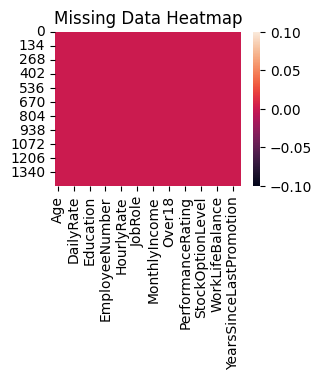

In [167]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(3, 2))
sns.heatmap(df.isnull())
plt.title("Missing Data Heatmap")
plt.show()

Removing unwanted columns

In [168]:
# removing unwanted columns
df=df.drop(['DailyRate','HourlyRate','StandardHours','StockOptionLevel','EmployeeCount','Over18','EmployeeNumber','TrainingTimesLastYear','RelationshipSatisfaction','JobLevel'], axis=1)
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender',
       'JobInvolvement', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'TotalWorkingYears',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [170]:
x=df.drop(['Attrition'], axis=1)
y=df['Attrition']

In [171]:
x.columns

Index(['Age', 'BusinessTravel', 'Department', 'DistanceFromHome', 'Education',
       'EducationField', 'EnvironmentSatisfaction', 'Gender', 'JobInvolvement',
       'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'TotalWorkingYears', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [ ]:
x.head()

In [ ]:
df['BusinessTravel'].unique()

In [ ]:
df['BusinessTravel'].value_counts()

In [ ]:
df['Department'].unique()

In [ ]:
df['JobRole'].unique()

In [ ]:
x.describe()

In [ ]:
df['EducationField'].unique()

In [ ]:
df['PercentSalaryHike'].unique()

In [ ]:
df['MaritalStatus'].unique()

In [ ]:
df['OverTime'].unique()

Outlier detection

In [172]:
# Outlier detection
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
numeric_cols

Index(['Age', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction',
       'JobInvolvement', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating',
       'TotalWorkingYears', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

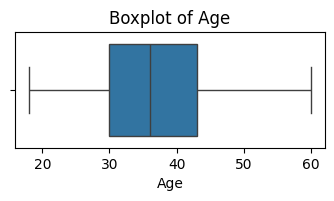

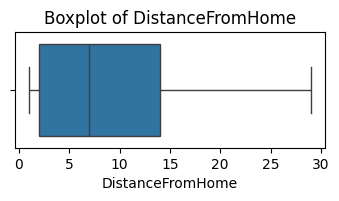

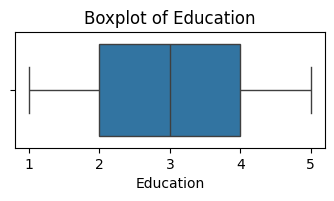

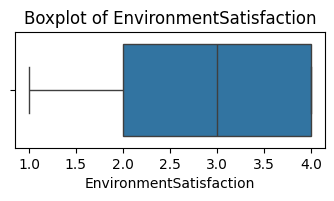

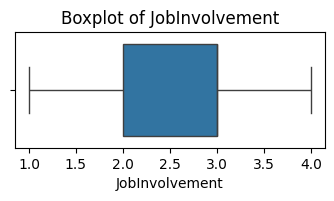

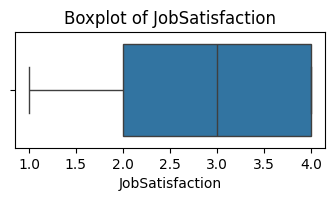

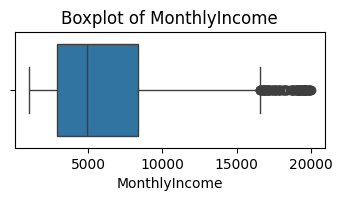

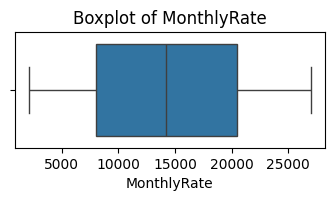

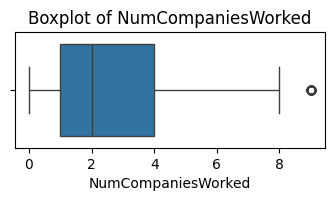

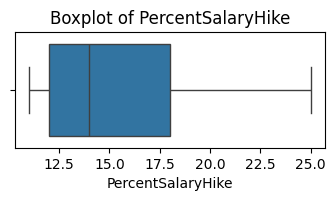

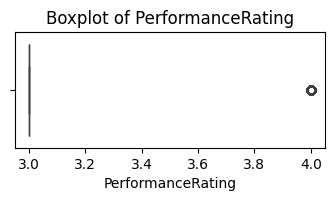

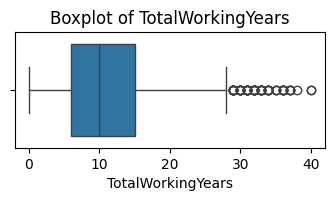

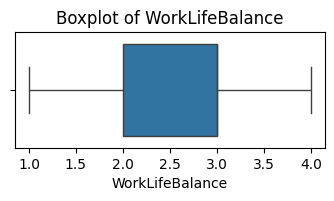

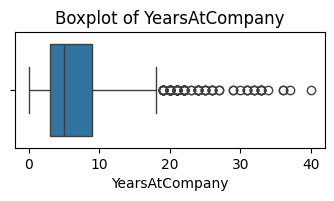

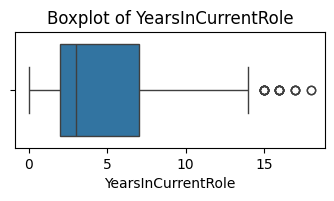

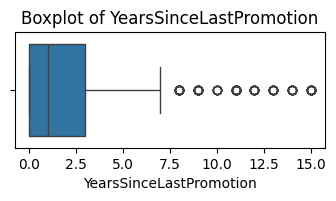

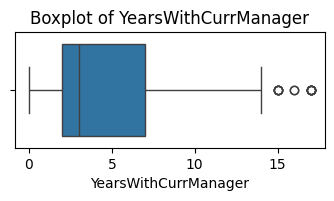

In [173]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in numeric_cols:
    plt.figure(figsize=(4, 1.5))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

Checking unique values in Target column

In [ ]:
df['Attrition']

In [174]:
df['Attrition'].unique()

array(['Yes', 'No'], dtype=object)

In [175]:
df['Attrition'].value_counts()

Attrition
No     1233
Yes     237
Name: count, dtype: int64

<Axes: xlabel='Attrition', ylabel='count'>

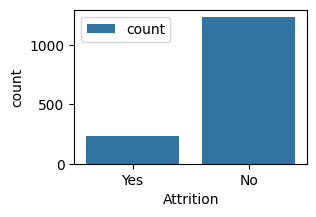

In [176]:
# visualize the count
plt.figure(figsize=(3,2))
sns.countplot(x=df['Attrition'], label="count", orient='h')

In [177]:
attrition = df['Attrition'].value_counts(normalize=True) * 100
print(attrition)

Attrition
No     83.877551
Yes    16.122449
Name: proportion, dtype: float64


Encoding(Label Encoding)

In [178]:
# Encoding
en=df.select_dtypes(include='object').columns
en

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'OverTime'],
      dtype='object')

In [179]:
from sklearn.preprocessing import LabelEncoder
le = preprocessing.LabelEncoder()
cols = ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']
encoders = {}
for col in cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoders[col] = le

In [180]:
df.corr()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,...,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,0.024751,-0.031882,-0.001686,0.208034,-0.040873,0.010146,-0.036311,0.029820,...,0.299635,0.028062,0.003634,0.001904,0.680381,-0.021490,0.311309,0.212901,0.216513,0.202089
Attrition,-0.159205,1.000000,0.000074,0.063991,0.077924,-0.031373,0.026846,-0.103369,0.029453,-0.130016,...,0.043494,0.246118,-0.013478,0.002889,-0.171063,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
BusinessTravel,0.024751,0.000074,1.000000,-0.009044,-0.024469,0.000757,0.023724,0.004174,-0.032981,0.039062,...,0.020875,0.016543,-0.029377,-0.026341,0.034226,-0.011256,-0.014575,-0.011497,-0.032591,-0.022636
Department,-0.031882,0.063991,-0.009044,1.000000,0.017225,0.007996,0.013720,-0.019395,-0.041583,-0.024586,...,-0.035882,0.007481,-0.007840,-0.024604,-0.015762,0.026383,0.022920,0.056315,0.040061,0.034282
DistanceFromHome,-0.001686,0.077924,-0.024469,0.017225,1.000000,0.021042,0.002013,-0.016075,-0.001851,0.008783,...,-0.029251,0.025514,0.040235,0.027110,0.004628,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.031373,0.000757,0.007996,0.021042,1.000000,-0.039592,-0.027128,-0.016547,0.042438,...,0.126317,-0.020322,-0.011111,-0.024539,0.148280,0.009819,0.069114,0.060236,0.054254,0.069065
EducationField,-0.040873,0.026846,0.023724,0.013720,0.002013,-0.039592,1.000000,0.043163,-0.002504,-0.002655,...,-0.008663,0.002259,-0.011214,-0.005614,-0.027848,0.041191,-0.018692,-0.010506,0.002326,-0.004130
EnvironmentSatisfaction,0.010146,-0.103369,0.004174,-0.019395,-0.016075,-0.027128,0.043163,1.000000,0.000508,-0.008278,...,0.012594,0.070132,-0.031701,-0.029548,-0.002693,0.027627,0.001458,0.018007,0.016194,-0.004999
Gender,-0.036311,0.029453,-0.032981,-0.041583,-0.001851,-0.016547,-0.002504,0.000508,1.000000,0.017960,...,-0.039147,-0.041924,0.002733,-0.013859,-0.046881,-0.002753,-0.029747,-0.041483,-0.026985,-0.030599
JobInvolvement,0.029820,-0.130016,0.039062,-0.024586,0.008783,0.042438,-0.002655,-0.008278,0.017960,1.000000,...,0.015012,-0.003507,-0.017205,-0.029071,-0.005533,-0.014617,-0.021355,0.008717,-0.024184,0.025976


<Axes: >

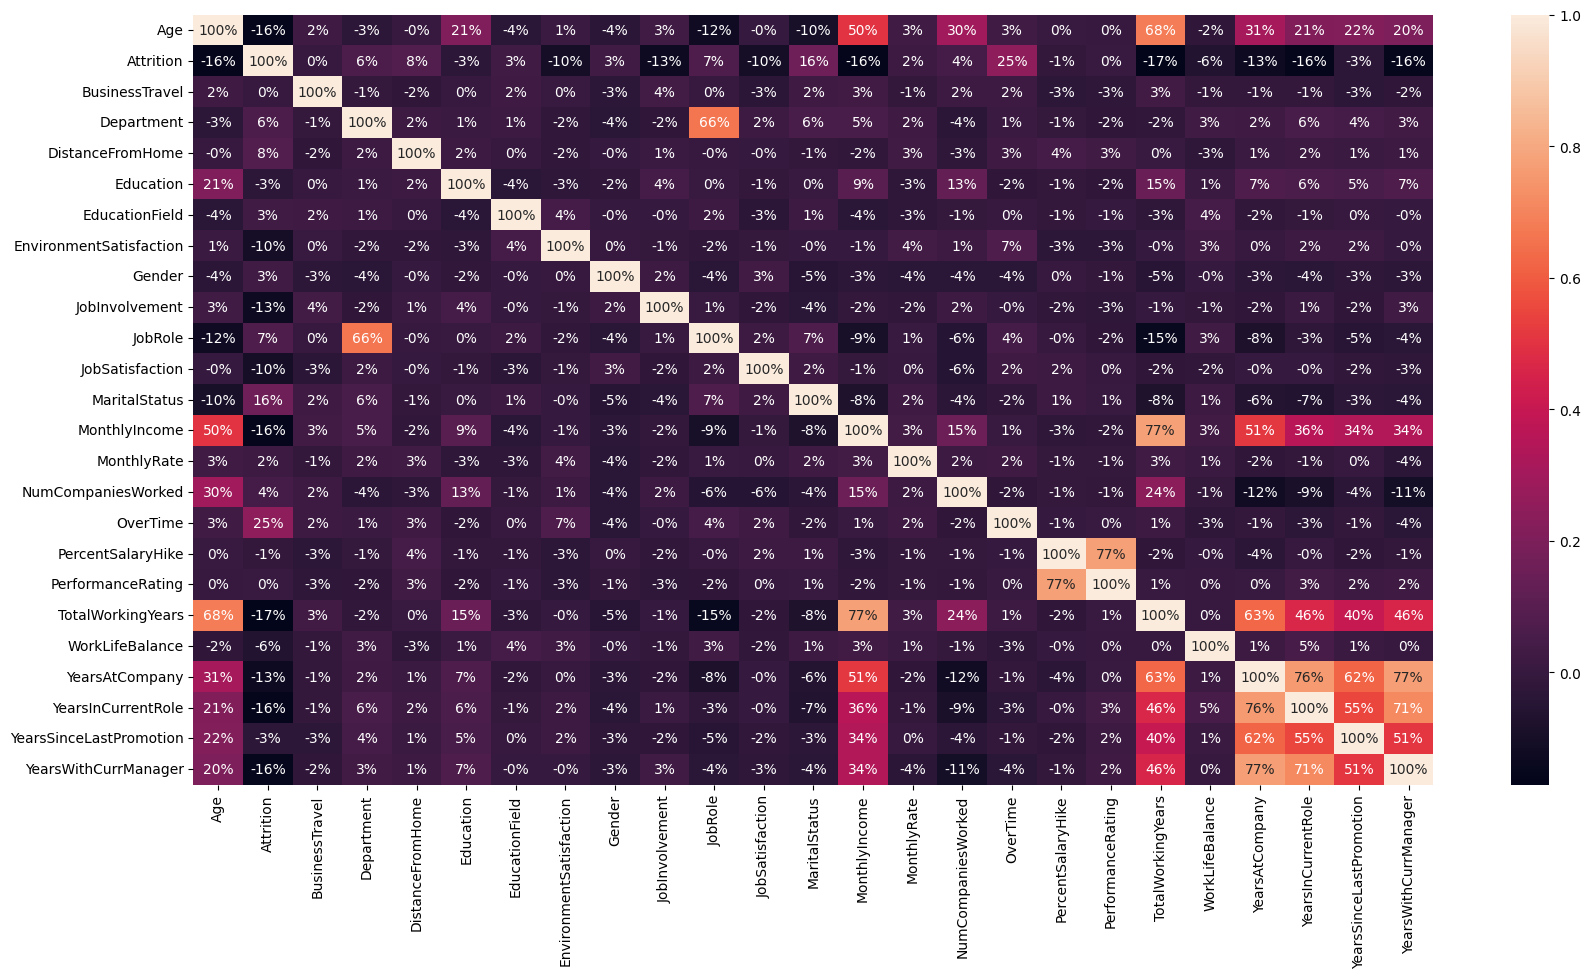

In [183]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True,fmt='.0%')

Splitting

In [184]:
  # spliting
from sklearn.model_selection import train_test_split

x=df.drop(['Attrition'], axis=1)
y=df['Attrition']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

y_train.value_counts()

Attrition
0    978
1    198
Name: count, dtype: int64

SMOTE ENN - Imbalance fix

In [187]:
# SMOTE ENN
from imblearn.combine import SMOTEENN
smote_enn = SMOTEENN()
x_train, y_train = smote_enn.fit_resample(x, y)
y_train.value_counts()

Attrition
1    653
0    558
Name: count, dtype: int64

<Axes: ylabel='count'>

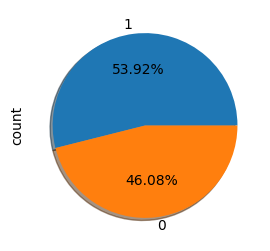

In [188]:
# checking using pie chart
y_train.value_counts().plot.pie(figsize=(3,3), autopct='%1.2f%%', shadow=True)

Scaling

In [190]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

Models

Logistic Regression

In [191]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()
lr_model.fit(x_train, y_train)

y_pred = lr_model.predict(x_test)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.7551020408163265
[[199  56]
 [ 16  23]]
              precision    recall  f1-score   support

           0       0.93      0.78      0.85       255
           1       0.29      0.59      0.39        39

    accuracy                           0.76       294
   macro avg       0.61      0.69      0.62       294
weighted avg       0.84      0.76      0.79       294



Random Forest

In [193]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.8707482993197279
[[228  27]
 [ 11  28]]
              precision    recall  f1-score   support

           0       0.95      0.89      0.92       255
           1       0.51      0.72      0.60        39

    accuracy                           0.87       294
   macro avg       0.73      0.81      0.76       294
weighted avg       0.89      0.87      0.88       294



Decision Tree Classifier

In [194]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.8333333333333334
[[213  42]
 [  7  32]]
              precision    recall  f1-score   support

           0       0.97      0.84      0.90       255
           1       0.43      0.82      0.57        39

    accuracy                           0.83       294
   macro avg       0.70      0.83      0.73       294
weighted avg       0.90      0.83      0.85       294



XGBoost

In [ ]:
!pip install xgboost

In [195]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train, y_train)
y_pred = xgb.predict(x_test)
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.8673469387755102
[[225  30]
 [  9  30]]
              precision    recall  f1-score   support

           0       0.96      0.88      0.92       255
           1       0.50      0.77      0.61        39

    accuracy                           0.87       294
   macro avg       0.73      0.83      0.76       294
weighted avg       0.90      0.87      0.88       294



Pickling

In [196]:

filename = 'randomforest_model.pkl'
pickle.dump(rf, open(filename, 'wb'))


In [197]:
import pickle
# save the model
with open('randomforest_model.pkl', 'wb') as filename:
    pickle.dump(rf, filename)

In [198]:
# Load the model
with open('randomforest_model.pkl','rb') as filename:
    loaded_model = pickle.load(filename)
loaded_model

RandomForestClassifier()

In [ ]:
# Use the loaded model for prediction
loaded_model.predict(x_test)

In [199]:
with open('labelencoder.pkl', 'wb') as file:
    pickle.dump(encoders, file)

In [200]:
with open('labelencoder.pkl', 'rb') as file:
    encoder_model = pickle.load(file)

In [201]:
with open('scaler.pkl', 'wb') as scalerfile:
    pickle.dump(scaler, scalerfile)